###### Laboratorium 6

Interpolacja

In [12]:
using Pkg
Pkg.add("Interpolations")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [14]:
using Plots
using Interpolations

In [15]:
# wylosowanie węzłów interpolacji
xs =  1:1:10
A = [rand() for x in xs]

10-element Array{Float64,1}:
 0.7586764036352422 
 0.29720911063590894
 0.25430138941654423
 0.4441982046264261 
 0.6474756247979367 
 0.9237125470255705 
 0.22676550690710462
 0.940007875610646  
 0.24602228865498876
 0.22473859178364797

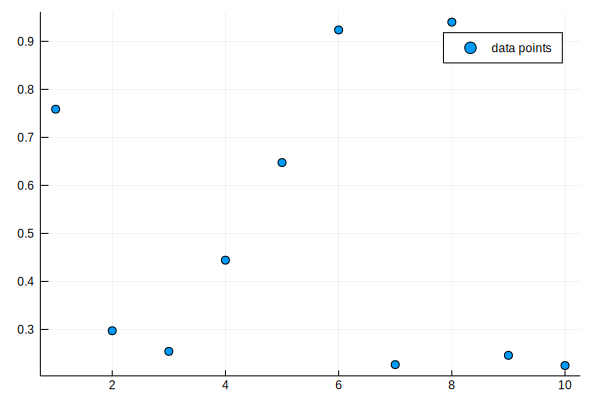

In [16]:
scatter(xs,A, label="data points")

In [17]:
# gęste punkty do rysowania wykresów funkcji interpolujacych
xsf=1:0.01:10

1.0:0.01:10.0

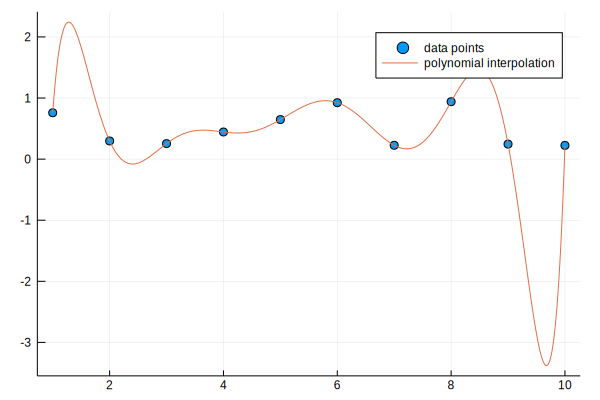

In [18]:
# interpolacja wielomianowa w pakiecie Polynomials
using Polynomials
fit1=polyfit(xs, A)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="polynomial interpolation")

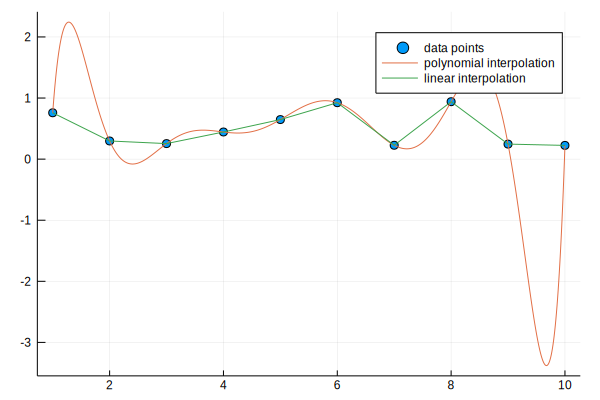

In [19]:
#  interpolacja liniowa z pakietu Interpolations - przykład
interp_linear = LinearInterpolation(xs, A)
B=[interp_linear(x) for x in xsf]
plot!(xsf,B, label="linear interpolation")

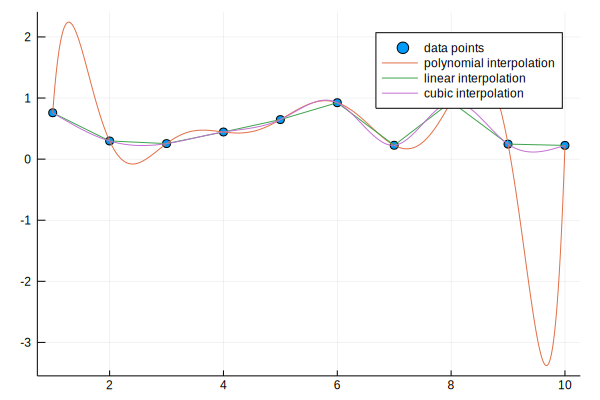

In [20]:
#  interpolacja szescienna 
interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")

In [21]:
#Interpolacja szescienna to BSpline z warunkami brzegowymi Line i OnGrid. 
#Więcej o konfiguracji warunkow brzegowych w
# dokumentacji https://github.com/JuliaMath/Interpolations.jl/blob/master/doc/Interpolations_algebra.pdf
interp_cubic

10-element extrapolate(scale(interpolate(OffsetArray(::Array{Float64,1}, 0:11), BSpline(Cubic(Line(OnGrid())))), (1:1:10,)), Throw()) with element type Float64:
 0.7586764036352421 
 0.29720911063590894
 0.2543013894165442 
 0.444198204626426  
 0.6474756247979366 
 0.9237125470255705 
 0.22676550690710445
 0.9400078756106461 
 0.24602228865498876
 0.224738591783648  

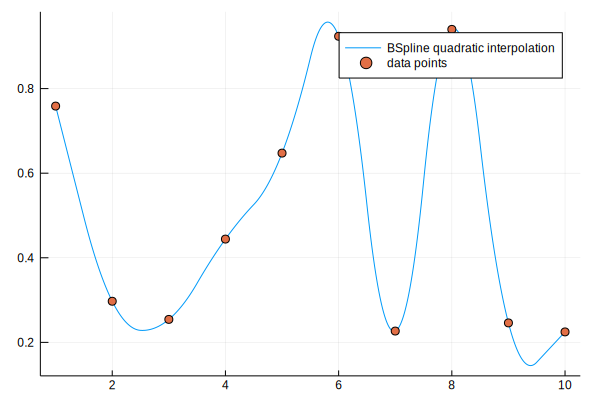

In [22]:
# Przyklad konfiguracji  BSpline-ów
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic interpolation")
scatter!(xs,A, label="data points")

### Zadania
- Napisać własną implementację interpolacji wielomianowej stosując wprost wzór na <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation.pdf"> wielomian interpolacyjny  Lagrange'a </a>. Język implementacji do wyboru (Julia, C). Przetestować swoją implementację na wylosowanych węzłach interpolacji w wybranym przedziale. Narysować wykres wielomianu interpolacyjnego w tym przedziale wraz z wezlami interpolacji. 

- Zrobic to samo dla metody <a href="https://www.icsr.agh.edu.pl/~mownit/pdf/03_interpolation.pdf"> Newtona (metoda ilorazów róznicowych)</a>. Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Jezyk implementacji wybrac taki sam, jak w poprzednim punkcie. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie.

- Zastosowac interpolację wielomianową z pakietu Polynomials (jesli wybralismy Julie) albo z 
funkcji <i> gsl_interp_polynomial</i> z pakietu <a href="https://www.gnu.org/software/gsl/doc/html/interp.html#">GSL</a> (jesli wybraliśmy C) do tych samych danych, co w poprzednich punktach. Porównać wszystkie 3 wyniki interpolacji wielomianowej na jednym wykresie. Co zauważamy? Dlaczego?

- Porownać metody poprzez pomiar czasu wykonania dla zmiennej ilości węzłow interpolacji. Dokonac pomiaru 10 razy i policzyc wartość średnią oraz oszacować bład pomiaru za pomoca odchylenia standardowego.  Narzedzie do analizy danych do wyboru (Julia, R)

- Poeksperymentowac z  interpolacją funkcjami sklejanymi (minimum dwie rozne funkcje sklejane),  narysowac wykresy i porownac z wykresami interpolacji wielomianowej. 

- Zademonstrowac  efekt Rungego. 

- Zbadać i zademonstrować podczas zajęc rózne algorytmy interpolacji stosowane w grafice komputerowej (np. do zmiany wielkości obrazu). Można korzystac z gotowych rozwiazań, ale trzeba wiedzieć, jak te algorytmy dzialaja. Do zaliczenia tego zadania potrzebne jest demonstracja i porownanie działania conajmniej dwóch metod.